In [5]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_496.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_5003.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_5942.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_6258.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_2162.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_8021.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_7693.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_4010.jpeg
/kaggle/input/rea

In [6]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import seaborn as sns
import cv2  # Replacing matplotlib with OpenCV for visualization
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.metrics import confusion_matrix, classification_report

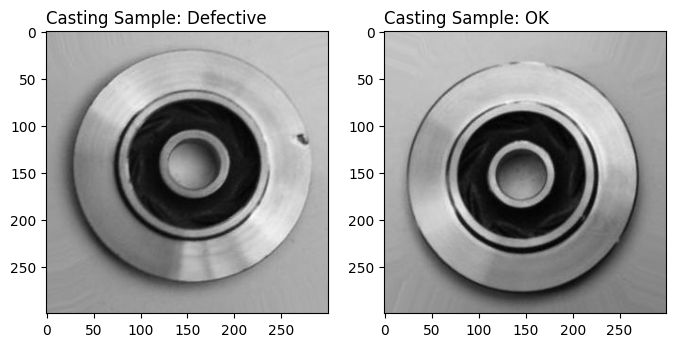

In [7]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
# Define directories
dir_train = '/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/'
dir_train_def = dir_train + 'def_front/'  # Class label: Defective
dir_train_ok = dir_train + 'ok_front/'    # Class label: OK

dir_test = '/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test/'
dir_test_def = dir_test + 'def_front/'
dir_test_ok = dir_test + 'ok_front/'

def show_sample(def_path, ok_path):
    sample_def = cv2.imread(def_path)
    sample_ok = cv2.imread(ok_path)

    sample_def = cv2.cvtColor(sample_def, cv2.COLOR_BGR2RGB)
    sample_ok = cv2.cvtColor(sample_ok, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(sample_def)
    axes[1].imshow(sample_ok)
    axes[0].set_title('Casting Sample: Defective', loc='left')
    axes[1].set_title('Casting Sample: OK', loc='left')
    for ax in axes:
        ax.grid(False)
    plt.show()


# Display the first image from each class
show_sample(dir_train_def + os.listdir(dir_train_def)[0], dir_train_ok + os.listdir(dir_train_ok)[0])

# PyTorch custom dataset
class CastingDataset(Dataset):
    def __init__(self, def_dir, ok_dir, transform=None):
        self.def_files = [os.path.join(def_dir, file) for file in os.listdir(def_dir)]
        self.ok_files = [os.path.join(ok_dir, file) for file in os.listdir(ok_dir)]
        self.file_paths = self.def_files + self.ok_files
        self.labels = [1] * len(self.def_files) + [0] * len(self.ok_files)
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        image_path = self.file_paths[idx]
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Example usage of the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])
])

train_dataset = CastingDataset(dir_train_def, dir_train_ok, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


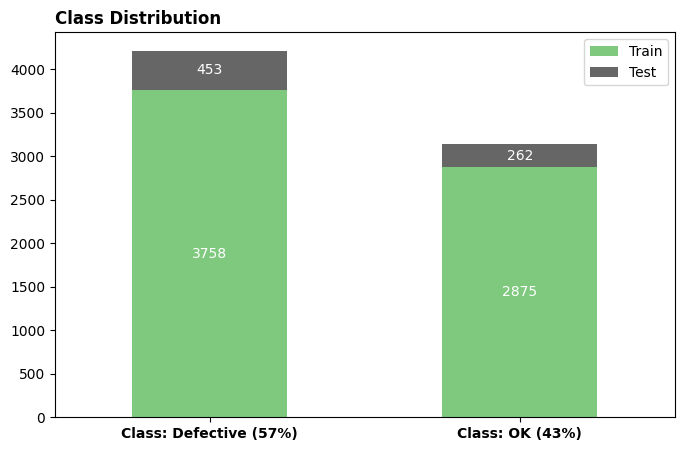

In [8]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Define directories
dir_train_def = '/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/def_front/'
dir_train_ok = '/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/ok_front/'
dir_test_def = '/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test/def_front/'
dir_test_ok = '/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test/ok_front/'

# Count number of images in each directory using OpenCV
def count_images(directory):
    return len([name for name in os.listdir(directory) if cv2.imread(os.path.join(directory, name)) is not None])

n_train = [count_images(dir_train_def), count_images(dir_train_ok)]
n_test = [count_images(dir_test_def), count_images(dir_test_ok)]

# Create dataframe of class distribution
dist_df = pd.DataFrame(
    data=[n_train, n_test],
    columns=['Defective', 'OK'],
    index=['Train', 'Test'])

# Visualize class distribution
ax = dist_df.T.plot(kind='bar', stacked=True, rot=0, figsize=(8,5), colormap='Accent')
ax.set_title('Class Distribution', loc='left', weight='bold')
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() - 0.25, 
            bar.get_y() + bar.get_height() / 2,
            int(bar.get_height()),
            ha='center', va='center', color='white')
pct_def = 100 * dist_df['Defective'].values.sum() / dist_df.values.sum()
pct_ok = 100 - pct_def
ax.set_xticklabels([f'Class: Defective ({pct_def:.0f}%)',
                    f'Class: OK ({pct_ok:.0f}%)'], weight='bold')
plt.show()


In [9]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

class CastingDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.file_paths = []
        self.labels = []

        for label, cls in {'ok_front': 0, 'def_front': 1}.items():
            cls_folder = os.path.join(directory, label)
            for file in os.listdir(cls_folder):
                self.file_paths.append(os.path.join(cls_folder, file))
                self.labels.append(cls)

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        image_path = self.file_paths[idx]
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (300, 300))  # Resize the image
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])
])

# Create dataset instances
train_dataset = CastingDataset(dir_train, transform=transform)
test_dataset = CastingDataset(dir_test, transform=transform)

# Splitting the dataset into train and validation sets
train_size = int(0.8 * len(train_dataset))
valid_size = len(train_dataset) - train_size
train_dataset, valid_dataset = random_split(train_dataset, [train_size, valid_size])

# Define DataLoader instances
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [10]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [10]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Input size: [1, 300, 300]
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=2, padding=1)
        # Output size: [32, 150, 150]
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Output size: [32, 75, 75]

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1)
        # Output size: [64, 38, 38]
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Output size: [64, 19, 19]

        self.flatten = nn.Flatten()
        # Output size: [64 * 19 * 19]

        self.fc1 = nn.Linear(64 * 19 * 19, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x
model = CNNModel()
print(model)


CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=23104, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming the CNNModel and CastingDataset classes are already defined
# Also, assuming you have train_loader and valid_loader set up using CastingDataset

# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(0.5).view(-1)
    return accuracy_score(y_true.cpu().numpy(), predicted.cpu().numpy())

# Training function
def train_model(model, criterion, optimizer, train_loader, valid_loader, epochs=10, device='cuda'):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_acc += calculate_accuracy(labels, outputs.sigmoid())

        # Calculate average loss and accuracy over an epoch
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)

        # Evaluate on the validation set
        model.eval()
        valid_loss = 0.0
        valid_acc = 0.0
        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                valid_loss += loss.item()
                valid_acc += calculate_accuracy(labels, outputs.sigmoid())

            valid_loss /= len(valid_loader)
            valid_acc /= len(valid_loader)

        print(f"Epoch {epoch+1}/{epochs} - Train loss: {train_loss:.4f}, "
              f"Valid loss: {valid_loss:.4f}")

# Model, Optimizer and Loss Function
model = CNNModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

# Train the model
train_model(model, criterion, optimizer, train_loader, valid_loader, epochs=10)

# Optionally, you can save the trained model
torch.save(model.state_dict(), 'cnn_model.pth')


Epoch 1/10 - Train loss: 0.5477, Valid loss: 0.5178
Epoch 2/10 - Train loss: 0.5152, Valid loss: 0.5065
Epoch 3/10 - Train loss: 0.5045, Valid loss: 0.4989
Epoch 4/10 - Train loss: 0.4993, Valid loss: 0.4965
Epoch 5/10 - Train loss: 0.4984, Valid loss: 0.5258
Epoch 6/10 - Train loss: 0.4975, Valid loss: 0.4911
Epoch 7/10 - Train loss: 0.4891, Valid loss: 0.4905
Epoch 8/10 - Train loss: 0.4892, Valid loss: 0.4940
Epoch 9/10 - Train loss: 0.4958, Valid loss: 0.4921
Epoch 10/10 - Train loss: 0.4869, Valid loss: 0.4902


In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [13]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization


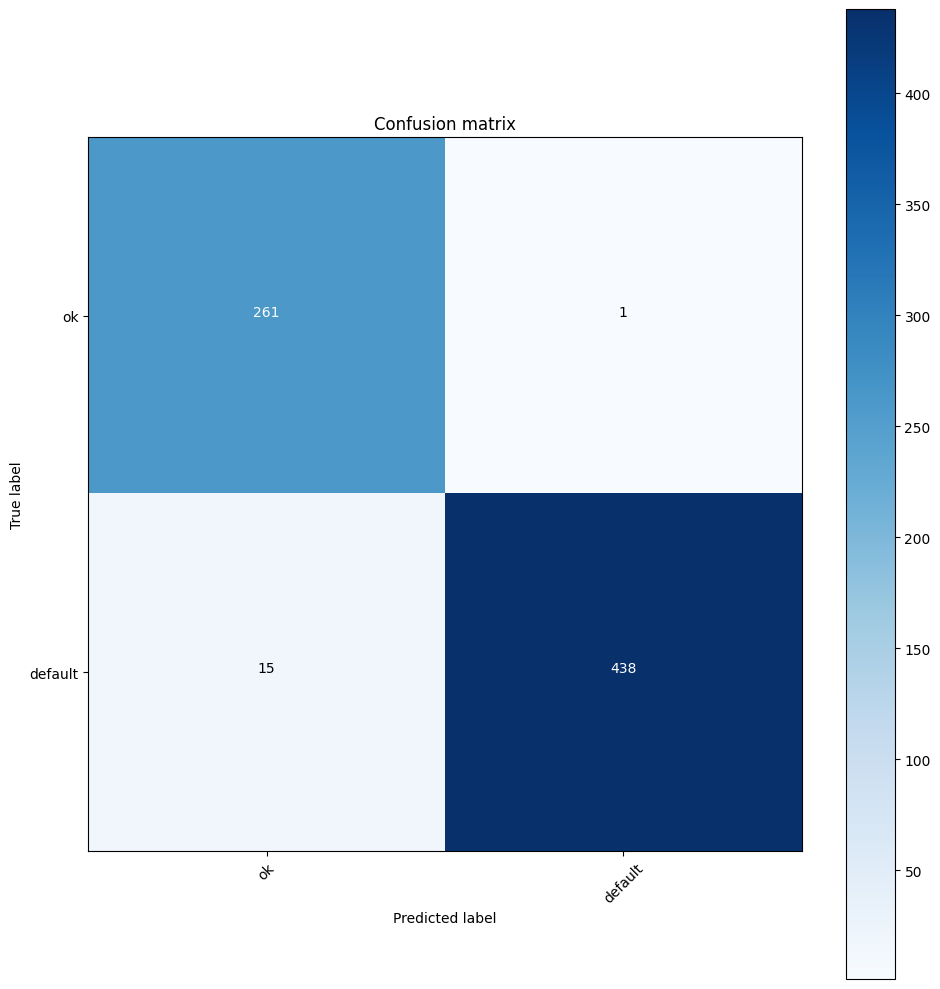

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.eval()  # Set the model to evaluation mode

# These lists will store the true and predicted labels
true_labels = []
pred_labels = []

with torch.no_grad():
    for images, labels in test_loader:  
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        # Convert outputs to predicted class (0 or 1)
        predicted = outputs.round()

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
classes = ['ok', 'default']  

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, classes, normalize=False)
plt.show()


Accuracy: 0.9776223776223776
False Positives: 1
False Negatives: 15


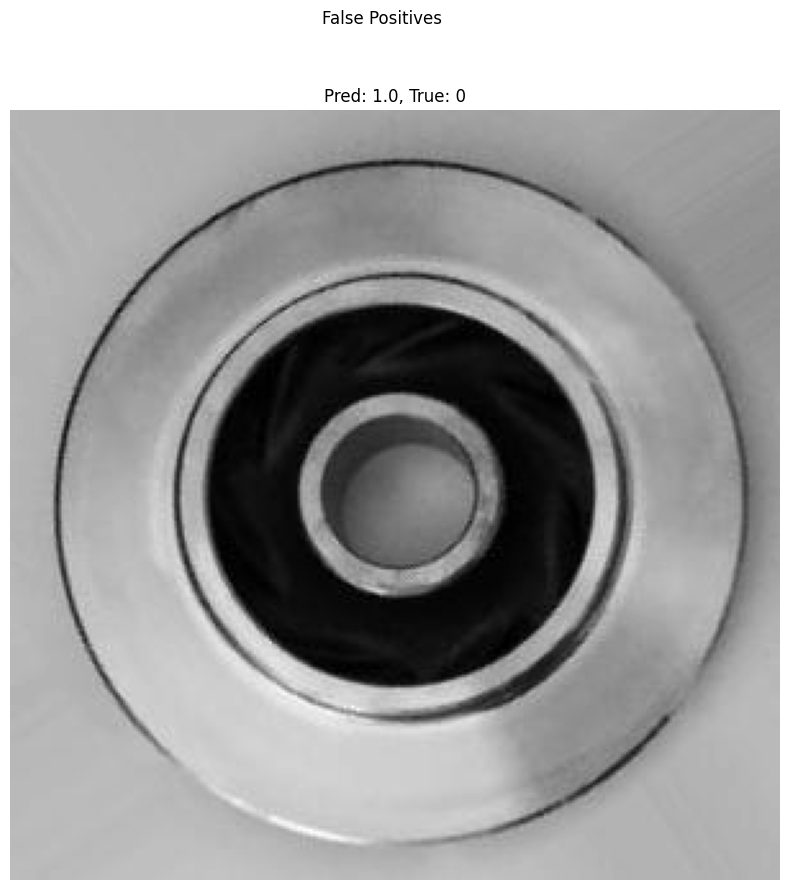

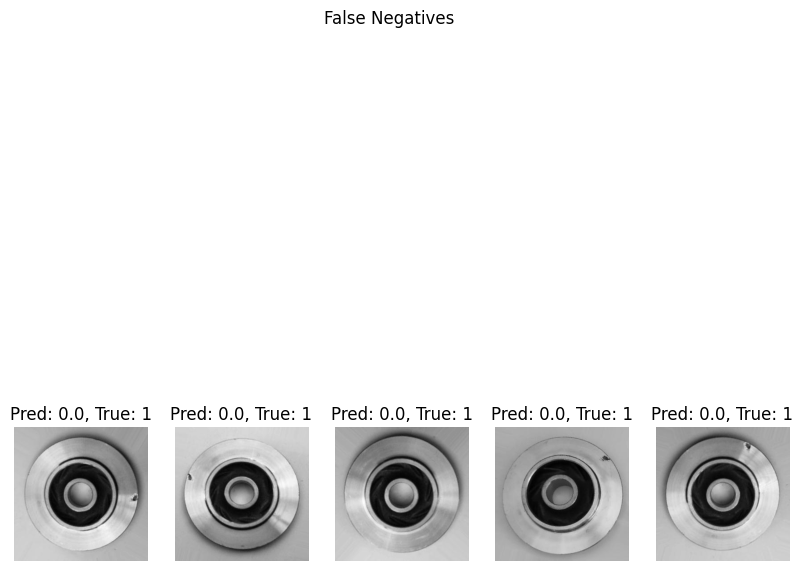

In [22]:
import torch
import matplotlib.pyplot as plt
import numpy as np


model.eval()  

true_labels = []
predicted_labels = []
false_positives = []
false_negatives = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predictions = outputs.round()  

        for i, (pred, true) in enumerate(zip(predictions, labels)):
            true_labels.append(true.item())
            predicted_labels.append(pred.item())

            if pred.item() == 1 and true.item() == 0:
                false_positives.append((images[i].cpu(), pred.item(), true.item()))  
            elif pred.item() == 0 and true.item() == 1:
                false_negatives.append((images[i].cpu(), pred.item(), true.item()))

# Calculate metrics
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
accuracy = np.mean(predicted_labels == true_labels)
false_positive_count = np.sum((predicted_labels == 1) & (true_labels == 0))
false_negative_count = np.sum((predicted_labels == 0) & (true_labels == 1))

print(f"Accuracy: {accuracy}")
print(f"False Positives: {false_positive_count}")
print(f"False Negatives: {false_negative_count}")

# Function to show images
def show_images(image_list, title):
    plt.figure(figsize=(10, 10))
    for i, (image, pred, true) in enumerate(image_list):
        plt.subplot(1, len(image_list), i + 1)
        plt.imshow(image.squeeze(), cmap='gray')  # Assuming grayscale image
        plt.title(f"Pred: {pred}, True: {true}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Show false positives and false negatives
show_images(false_positives[:5], "False Positives")  # Show first 5 false positives
show_images(false_negatives[:5], "False Negatives")  # Show first 5 false negatives
